In [104]:
import numpy as np 
import matplotlib.pyplot as plt
import network

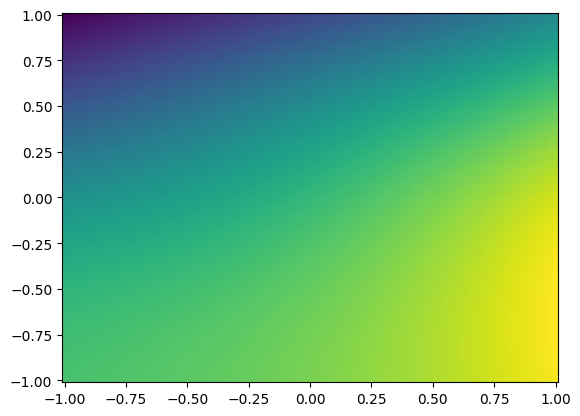

In [105]:
net = Network([2, 4, 1])

# training data
x_train = np.random.uniform(-1, 1, [2, 100])
y_train = 0.5*np.sign(x_train[0]*x_train[1]) + 0.5


# test data
x_test = np.random.uniform(-1, 1, [2, 80])
y_test = 0.5*np.sign(x_test[0]*x_test[1]) + 0.5

test_data = list(zip((x_test).reshape(len(x_test[0]), 2, 1), y_test.reshape(len(x_test[0]), 1, 1)))
train_data = list(zip((x_train).reshape(len(x_train[0]), 2, 1), y_train.reshape(len(x_train[0]), 1, 1)))

XX, YY = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

ZZ = net.feedforward((XX.flatten(), YY.flatten()))

plt.pcolormesh(XX, YY, ZZ.reshape(XX.shape))



In [98]:
train_data[:5]

[(array([[-0.19143469],
         [-0.38585159]]),
  array([[0.]])),
 (array([[-0.58523835],
         [-0.91502488]]),
  array([[0.]])),
 (array([[-0.50504459],
         [ 0.65094617]]),
  array([[0.]])),
 (array([[-0.46662041],
         [-0.9255651 ]]),
  array([[1.]])),
 (array([[-0.25266297],
         [-0.73781906]]),
  array([[0.]]))]

In [101]:
%%capture
net.SGD(train_data, 1000, 20, 3.0)

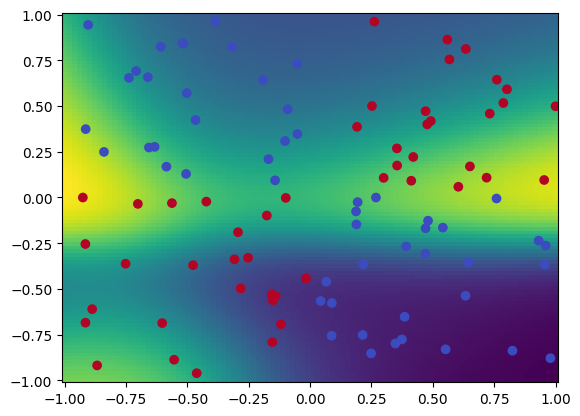

In [103]:
# plot data

X, YY = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

ZZ = net.feedforward(np.vstack([XX.flatten(), YY.flatten()]))

plt.pcolormesh(XX, YY, ZZ.reshape(XX.shape),shading='auto' )
plt.scatter(x_train[0], x_train[1], c=y_train, cmap=plt.cm.coolwarm)